# 과수화상병 데이터를 통한 이미지 분류 모델 구축하기

# Description

- Dataset : 주요 과수(사과, 배)의 화상병 및 유사 병종의 이미지 데이터
- Purpose : 과수화상병 진단 및 처방 목적의 학습 데이터 구축을 통해 이미지 분류 모델을 배포하기

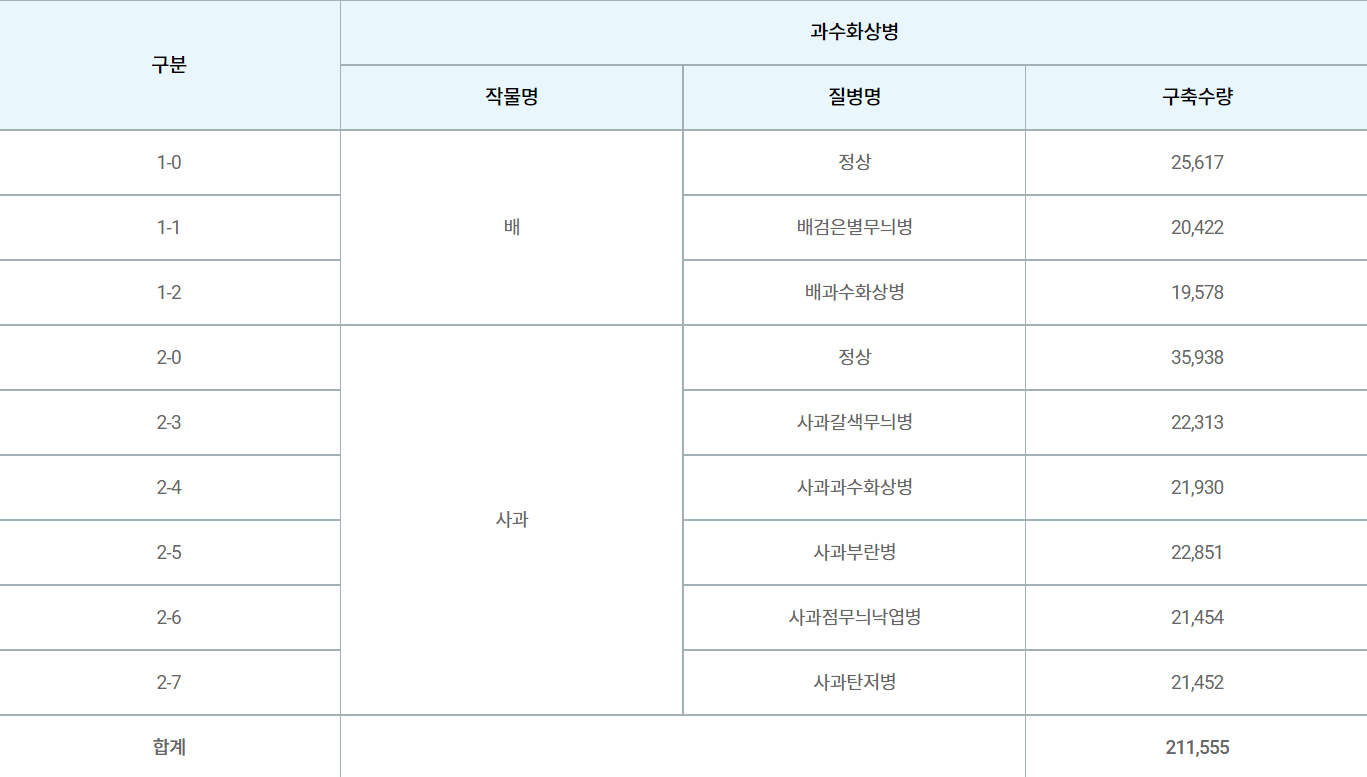

# Import libraries & load dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format

import random
import cv2
import os
import glob
# use gpu
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

import math
import scipy as sp
import PIL
from PIL import Image, ImageOps
import copy
import itertools

# Tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2
#from keras_tuner.tuners import RandomSearch

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# split dataset
import splitfolders

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# flask
from flask import Flask
from flask import render_template
from flask import request

# json 
import json
import xmltodict
from json2xml import json2xml
from pandas.io.json import json_normalize
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, SubElement, ElementTree

In [10]:
# # Image data folder paths
# pear0_train = './Training/원본/배_0.정상/'
# pear1_train = './Training/원본/배_1.질병/'
# apple0_train = './Training/원본/사과_0.정상/'
# apple1_train = './Training/원본/사과_1.질병/'
# pear0_test = './Validation/원본/배_0.정상/'
# pear1_test = './Validation/원본/배_1.질병/'
# apple0_test = './Validation/원본/사과_0.정상/'
# apple1_test = './Validation/원본/사과_1.질병/'

In [8]:
# Train_x = []
# Train_y = []
    
# for FileName in os.listdir(pear0_train):
#     FileName = FileName.upper()
#     if ('V006_80_0_00' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(pear0_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(0)
# print('Task0 Finished')
             
# for FileName in os.listdir(pear1_train):
#     if ('V006_80_1_01' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(pear1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(1)
# print('Task1 Finished')

# for FileName in os.listdir(pear1_train):
#     if ('V006_80_1_02' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(pear1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(2)
# print('Task2 Finished')

# for FileName in os.listdir(apple1_train):
#     if ('V006_80_1_03' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(3)
# print('Task3 Finished')

# for FileName in os.listdir(apple1_train):
#     if ('V006_80_1_04' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(4)
# print('Task4 Finished')

# for FileName in os.listdir(apple1_train):
#     if ('V006_80_1_05' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(5)
# print('Task5 Finished')

# for FileName in os.listdir(apple1_train):
#     if ('V006_80_1_06' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(6)
# print('Task6 Finished') 

# for FileName in os.listdir(apple1_train):
#     if ('V006_80_1_07' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(7)
# print('Task7 Finished')

# for FileName in os.listdir(apple0_train):
#     FileName = FileName.upper()
#     if ('V006_80_0_00' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple0_train + FileName))
#         Train_x.append(temp)
#         Train_y.append(8)
# print('Task8 Finished')

Task0 Finished
Task1 Finished
Task2 Finished
Task3 Finished
Task4 Finished
Task5 Finished
Task6 Finished
Task7 Finished
Task8 Finished


In [ ]:
# Train_x = np.stack(Train_x, axis=0 )
# Train_y = np.array(Train_y)
# print(Train_x.shape) 
# print(Train_y.shape)

In [11]:
# Test_x = []
# Test_y = []
    
# for FileName in os.listdir(pear0_test):
#     FileName = FileName.upper()
#     if ('V006_80_0_00' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(pear0_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(0)
# print('Task0 Finished')
             
# for FileName in os.listdir(pear1_test):
#     if ('V006_80_1_01' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(pear1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(1)
# print('Task1 Finished')

# for FileName in os.listdir(pear1_test):
#     if ('V006_80_1_02' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(pear1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(2)
# print('Task2 Finished')

# for FileName in os.listdir(apple1_test):
#     if ('V006_80_1_03' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(3)
# print('Task3 Finished')

# for FileName in os.listdir(apple1_test):
#     if ('V006_80_1_04' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(4)
# print('Task4 Finished')

# for FileName in os.listdir(apple1_test):
#     if ('V006_80_1_05' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(5)
# print('Task5 Finished')

# for FileName in os.listdir(apple1_test):
#     if ('V006_80_1_06' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(6)
# print('Task6 Finished')

# for FileName in os.listdir(apple1_test):
#     if ('V006_80_1_07' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple1_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(7)
# print('Task7 Finished')

# for FileName in os.listdir(apple0_test):
#     FileName = FileName.upper()
#     if ('V006_80_0_00' in FileName):
#         temp = copy.deepcopy(PIL.Image.open(apple0_test + FileName))
#         Test_x.append(temp)
#         Test_y.append(8)
# print('Task8 Finished')

Task0 Finished
Task1 Finished
Task2 Finished
Task3 Finished
Task4 Finished
Task5 Finished
Task6 Finished
Task7 Finished
Task8 Finished


In [ ]:
# Test_x = np.stack(Test_x, axis=0)
# Test_y = np.array(Test_y)
# print(Test_x.shape) 
# print(Test_y.shape)

In [18]:
apple0_train = './Train/00_사과정상/'
apple1_train = './Train/01_사과갈색무늬병/'
apple2_train = './Train/02_사과과수화상병/'
apple3_train = './Train/03_사과부란병/'
apple4_train = './Train/04_사과점무늬낙엽병/'
apple5_train = './Train/05_사과탄저병/'

In [19]:
Train_x = []
Train_y = []
    
for FileName in os.listdir(apple0_train):
        temp = copy.deepcopy(PIL.Image.open(apple0_train + FileName))
        Train_x.append(temp)
        Train_y.append(0)
print('Task0 Finished')
             
for FileName in os.listdir(apple1_train):
        temp = copy.deepcopy(PIL.Image.open(apple1_train + FileName))
        Train_x.append(temp)
        Train_y.append(1)
print('Task1 Finished')

for FileName in os.listdir(apple2_train):
        temp = copy.deepcopy(PIL.Image.open(apple2_train + FileName))
        Train_x.append(temp)
        Train_y.append(2)
print('Task2 Finished')

for FileName in os.listdir(apple3_train):
        temp = copy.deepcopy(PIL.Image.open(apple3_train + FileName))
        Train_x.append(temp)
        Train_y.append(3)
print('Task3 Finished')

for FileName in os.listdir(apple4_train):
        temp = copy.deepcopy(PIL.Image.open(apple4_train + FileName))
        Train_x.append(temp)
        Train_y.append(4)
print('Task4 Finished')

for FileName in os.listdir(apple5_train):
        temp = copy.deepcopy(PIL.Image.open(apple5_train + FileName))
        Train_x.append(temp)
        Train_y.append(5)
print('Task5 Finished')

Task0 Finished
Task1 Finished
Task2 Finished
Task3 Finished
Task4 Finished
Task5 Finished


In [20]:
Train_x = np.stack(Train_x, axis=0 )
Train_y = np.array(Train_y)
print(Train_x.shape) 
print(Train_y.shape)

(37024, 224, 224, 3)
(37024,)


In [21]:
apple0_test = './Test/00_사과정상/'
apple1_test = './Test/01_사과갈색무늬병/'
apple2_test = './Test/02_사과과수화상병/'
apple3_test = './Test/03_사과부란병/'
apple4_test = './Test/04_사과점무늬낙엽병/'
apple5_test = './Test/05_사과탄저병/'

In [22]:
Test_x = []
Test_y = []
    
for FileName in os.listdir(apple0_test):
        temp = copy.deepcopy(PIL.Image.open(apple0_test + FileName))
        Test_x.append(temp)
        Test_y.append(0)
print('Task0 Finished')
             
for FileName in os.listdir(apple1_test):
        temp = copy.deepcopy(PIL.Image.open(apple1_test + FileName))
        Test_x.append(temp)
        Test_y.append(1)
print('Task1 Finished')

for FileName in os.listdir(apple2_test):
        temp = copy.deepcopy(PIL.Image.open(apple2_test + FileName))
        Test_x.append(temp)
        Test_y.append(2)
print('Task2 Finished')

for FileName in os.listdir(apple3_test):
        temp = copy.deepcopy(PIL.Image.open(apple3_test + FileName))
        Test_x.append(temp)
        Test_y.append(3)
print('Task3 Finished')

for FileName in os.listdir(apple4_test):
        temp = copy.deepcopy(PIL.Image.open(apple4_test+ FileName))
        Test_x.append(temp)
        Test_y.append(4)
print('Task4 Finished')

for FileName in os.listdir(apple5_test):
        temp = copy.deepcopy(PIL.Image.open(apple5_test + FileName))
        Test_x.append(temp)
        Test_y.append(5)
print('Task5 Finished')

Task0 Finished
Task1 Finished
Task2 Finished
Task3 Finished
Task4 Finished
Task5 Finished


In [23]:
Test_x = np.stack(Test_x, axis=0)
Test_y = np.array(Test_y)
print(Test_x.shape) 
print(Test_y.shape)

(4631, 224, 224, 3)
(4631,)


# Load model

In [24]:
batch_size = 32
epochs = 15
LearningRate = 1e-3 
Decay = 1e-6
img_width = 224
img_height = 224

In [25]:
CurrentDirectory = './'
train_directory = CurrentDirectory + 'Train/'
test_directory = CurrentDirectory + 'Test/'
model_directory = CurrentDirectory + 'Models/'
tensorboard_directory = CurrentDirectory + 'Tensorboard/'

In [26]:
# VGG19
VGG19_Model = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_width,img_height,3), pooling=None)
x = GlobalAveragePooling2D()(VGG19_Model.output)
predictions = Dense(6, activation='softmax')(x)

DeepLearning = Model(inputs=VGG19_Model.input, outputs=predictions)
DeepLearning.compile(optimizer=
         SGD(lr=LearningRate, decay=Decay, momentum=0.9, nesterov=True), 
         loss='categorical_crossentropy',
         metrics=['acc']
)

# Create generators

In [27]:
DATAGEN_TRAIN = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last",
    validation_split=0.10) 
DATAGEN_TEST = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last")

In [28]:
TRAIN_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical",
    subset = "training")

VALID_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical",
    subset = "validation")

TEST_GENERATOR = DATAGEN_TEST.flow_from_directory(
    test_directory,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle = False,
    class_mode= "categorical")

Found 33325 images belonging to 6 classes.
Found 3699 images belonging to 6 classes.
Found 4631 images belonging to 6 classes.


In [29]:
Image, Label = TEST_GENERATOR.__getitem__(0)

# Callback & Fit model

In [30]:
CP = ModelCheckpoint(filepath=model_directory+'VGG19-{epoch:03d}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')
TB = TensorBoard(log_dir=tensorboard_directory, write_graph=True, write_images=True)
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

CALLBACK = [CP, TB, LR]

In [32]:
with tf.device('/device:GPU:0'):
    DeepLearning.fit(
        TRAIN_GENERATOR,
        steps_per_epoch=TRAIN_GENERATOR.n / batch_size,
        epochs=10,
        callbacks=CALLBACK,
        shuffle=True, 
        validation_data=VALID_GENERATOR)

Epoch 1/10
1042/1041 [==============================] - ETA: 0s - loss: 0.1864 - acc: 0.9382
Epoch 1: val_acc improved from -inf to 0.88727, saving model to ./Models\VGG19-001-0.3730-0.8873.hdf5
1041/1041 [==============================] - 602s 577ms/step - loss: 0.1864 - acc: 0.9382 - val_loss: 0.3730 - val_acc: 0.8873 - lr: 0.0010
Epoch 2/10
1042/1041 [==============================] - ETA: 0s - loss: 0.1102 - acc: 0.9634
Epoch 2: val_acc improved from 0.88727 to 0.93431, saving model to ./Models\VGG19-002-0.1998-0.9343.hdf5
1041/1041 [==============================] - 593s 570ms/step - loss: 0.1102 - acc: 0.9634 - val_loss: 0.1998 - val_acc: 0.9343 - lr: 0.0010
Epoch 3/10
1042/1041 [==============================] - ETA: 0s - loss: 0.0829 - acc: 0.9730
Epoch 3: val_acc did not improve from 0.93431
1041/1041 [==============================] - 594s 570ms/step - loss: 0.0829 - acc: 0.9730 - val_loss: 0.3504 - val_acc: 0.8919 - lr: 0.0010
Epoch 4/10
1042/1041 [==========================

# Evaluate

In [33]:
DeepLearning.load_weights('./Models/Apple_VGG19-009-0.0922-0.9705.hdf5')

In [34]:
DeepLearning.evaluate(VALID_GENERATOR)

116/116 [==============================] - 29s 249ms/step - loss: 0.0861 - acc: 0.9708


[0.08614658564329147, 0.970802903175354]

In [35]:
DeepLearning.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
TEST_Prediction = DeepLearning.predict_generator(TEST_GENERATOR, verbose=1)

145/145 [==============================] - 29s 199ms/step


In [37]:
Result = pd.DataFrame(TEST_Prediction)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

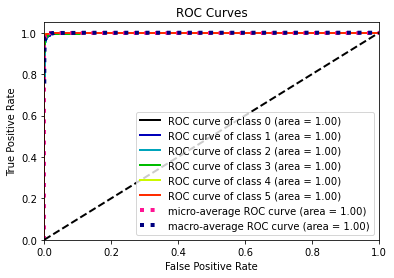

In [38]:
skplt.metrics.plot_roc(TEST_GENERATOR.classes.tolist(), Result)

# Model Test

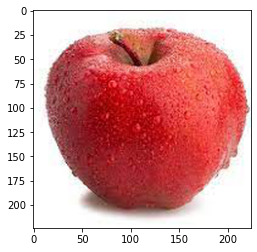

1/1 [==============================] - 0s 98ms/step
파일 이름 : 1.jpg
업로드한 사진과 유사한 이미지는 99.62874% 확률로 정상 사과입니다.




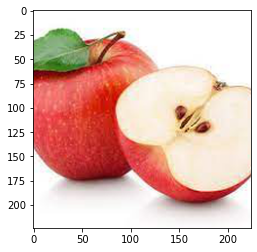

1/1 [==============================] - 0s 13ms/step
파일 이름 : 10.jpg
업로드한 사진과 유사한 이미지는 99.878654% 확률로 사과탄저병입니다.




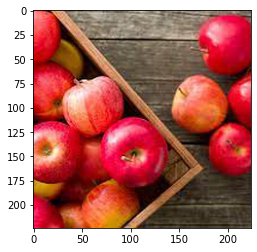

1/1 [==============================] - 0s 14ms/step
파일 이름 : 11.jpg
업로드한 사진과 유사한 이미지는 98.48419% 확률로 사과탄저병입니다.




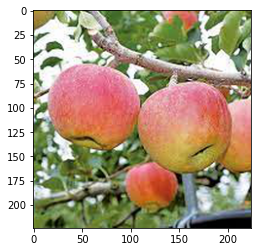

1/1 [==============================] - 0s 14ms/step
파일 이름 : 111.jpg
업로드한 사진과 유사한 이미지는 99.99754% 확률로 정상 사과입니다.




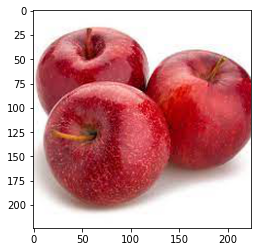

1/1 [==============================] - 0s 15ms/step
파일 이름 : 12.jpg
업로드한 사진과 유사한 이미지는 99.98481% 확률로 사과탄저병입니다.




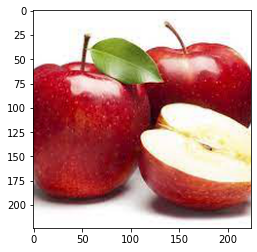

1/1 [==============================] - 0s 13ms/step
파일 이름 : 13.jpg
업로드한 사진과 유사한 이미지는 96.79127% 확률로 정상 사과입니다.




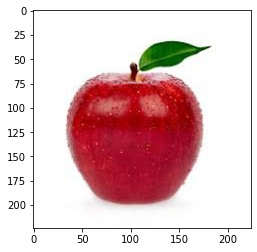

1/1 [==============================] - 0s 15ms/step
파일 이름 : 14.jpg
업로드한 사진과 유사한 이미지는 68.72766% 확률로 정상 사과입니다.




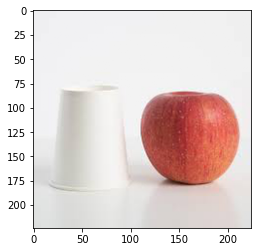

1/1 [==============================] - 0s 14ms/step
파일 이름 : 15.jpg
업로드한 사진과 유사한 이미지는 92.81101% 확률로 사과탄저병입니다.




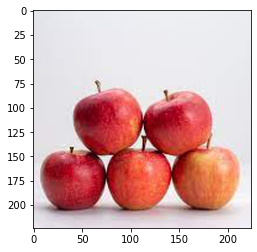

1/1 [==============================] - 0s 13ms/step
파일 이름 : 16.jpg
업로드한 사진과 유사한 이미지는 98.53527% 확률로 사과탄저병입니다.




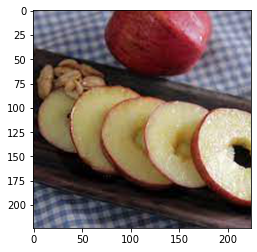

1/1 [==============================] - 0s 15ms/step
파일 이름 : 17.jpg
업로드한 사진과 유사한 이미지는 84.375946% 확률로 사과탄저병입니다.




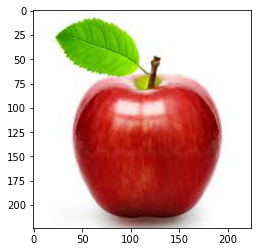

1/1 [==============================] - 0s 15ms/step
파일 이름 : 18.jpg
업로드한 사진과 유사한 이미지는 51.2286% 확률로 정상 사과입니다.


업로드한 사진과 유사한 이미지는 48.552452% 확률로 사과탄저병입니다.




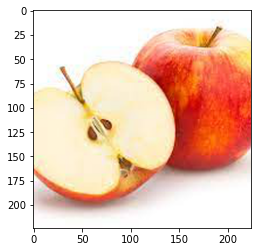

1/1 [==============================] - 0s 12ms/step
파일 이름 : 19.jpg
업로드한 사진과 유사한 이미지는 99.99538% 확률로 사과탄저병입니다.




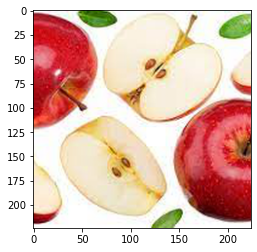

1/1 [==============================] - 0s 13ms/step
파일 이름 : 2.jpg
업로드한 사진과 유사한 이미지는 99.98896% 확률로 사과탄저병입니다.




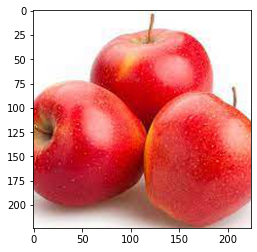

1/1 [==============================] - 0s 13ms/step
파일 이름 : 20.jpg
업로드한 사진과 유사한 이미지는 53.20713% 확률로 정상 사과입니다.


업로드한 사진과 유사한 이미지는 46.714024% 확률로 사과탄저병입니다.




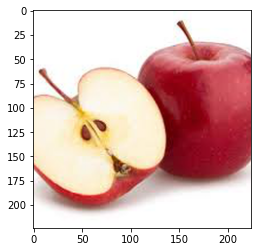

1/1 [==============================] - 0s 13ms/step
파일 이름 : 3.jpg
업로드한 사진과 유사한 이미지는 99.99985% 확률로 사과탄저병입니다.




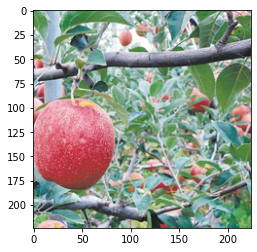

1/1 [==============================] - 0s 15ms/step
파일 이름 : 31.jpg
업로드한 사진과 유사한 이미지는 99.98585% 확률로 정상 사과입니다.




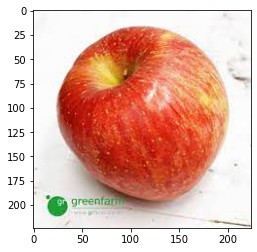

1/1 [==============================] - 0s 14ms/step
파일 이름 : 4.jpg
업로드한 사진과 유사한 이미지는 88.57158% 확률로 사과탄저병입니다.




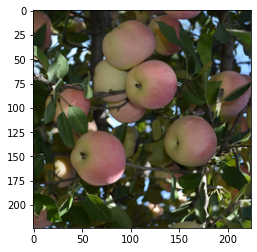

1/1 [==============================] - 0s 15ms/step
파일 이름 : 4.webp
업로드한 사진과 유사한 이미지는 71.11881% 확률로 사과탄저병입니다.




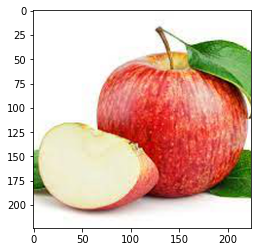

1/1 [==============================] - 0s 13ms/step
파일 이름 : 5.jpg
업로드한 사진과 유사한 이미지는 88.40448% 확률로 사과탄저병입니다.




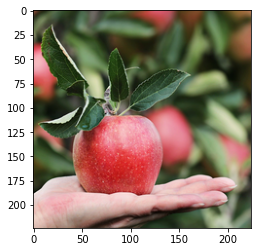

1/1 [==============================] - 0s 14ms/step
파일 이름 : 51.jpg
업로드한 사진과 유사한 이미지는 99.93523% 확률로 정상 사과입니다.




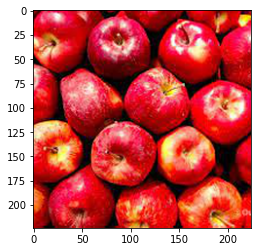

1/1 [==============================] - 0s 14ms/step
파일 이름 : 6.jpg
업로드한 사진과 유사한 이미지는 79.77269% 확률로 사과탄저병입니다.




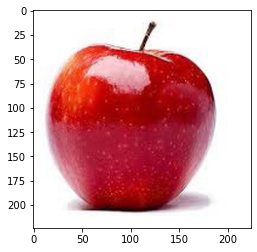

1/1 [==============================] - 0s 13ms/step
파일 이름 : 7.jpg
업로드한 사진과 유사한 이미지는 94.48599% 확률로 정상 사과입니다.




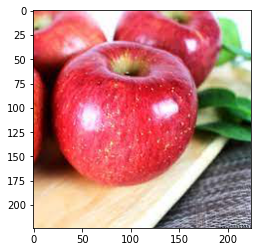

1/1 [==============================] - 0s 15ms/step
파일 이름 : 8.jpg
업로드한 사진과 유사한 이미지는 84.832245% 확률로 사과탄저병입니다.




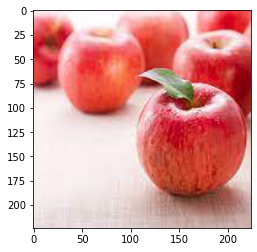

1/1 [==============================] - 0s 14ms/step
파일 이름 : 9.jpg
업로드한 사진과 유사한 이미지는 99.9749% 확률로 사과탄저병입니다.




In [5]:
model = load_model('./Models/Apple_VGG19-009-0.0922-0.9705.hdf5')
fruit = ['정상 사과','사과갈색무늬병','사과과수화상병','사과부란병','사과점무늬낙엽병','사과탄저병']
path = './uploads/0_사과/'
# for i in range(10):
for FileName in os.listdir(path):
#     FileName=random.choice(os.listdir(path))
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    img = copy.deepcopy(PIL.Image.open(path + FileName))
    img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
    normalized_image_array = np.asarray(img, dtype = 'float32') / 255.
    plt.imshow(normalized_image_array)
    plt.show()
    
    data[0] = normalized_image_array
    result = (model.predict(data))*100
    # result1 = pd.DataFrame(result)
    a= result.tolist()
    a.sort()
    print("파일 이름 : " + FileName)
    for i in range(len(result[0])) :
        if result[0][i] > 40:
            a = result[0][i]
            a = a.astype(str)
            print("업로드한 사진과 유사한 이미지는 " + a + "% 확률로 " + fruit[i] + "입니다.")
            print('\n')
       

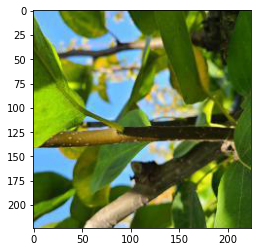

1/1 [==============================] - 0s 435ms/step
파일 이름 : V006_80_0_00_01_04_25_0_C06_20201029_0147_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.94236% 확률로 정상 배입니다.




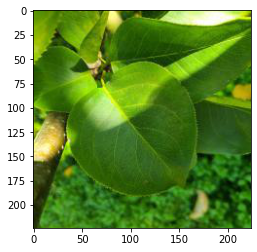

1/1 [==============================] - 0s 17ms/step
파일 이름 : V006_80_0_00_01_03_25_0_C06_20201028_0369_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.992004% 확률로 정상 배입니다.




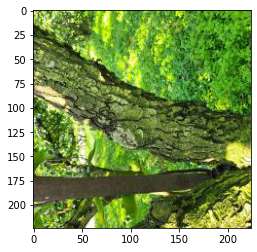

1/1 [==============================] - 0s 16ms/step
파일 이름 : V006_80_0_00_01_05_25_0_C06_20201020_0158_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.99882% 확률로 정상 배입니다.




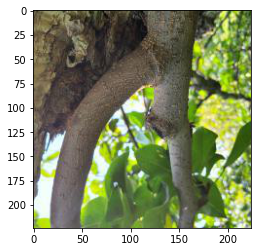

1/1 [==============================] - 0s 18ms/step
파일 이름 : V006_80_0_00_01_04_25_0_C06_20201026_0126_S01_1.JPG
업로드한 사진과 유사한 이미지는 96.34755% 확률로 정상 배입니다.




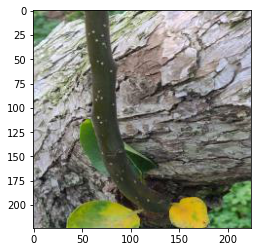

1/1 [==============================] - 0s 18ms/step
파일 이름 : V006_80_0_00_01_04_25_0_C14_20201027_0024_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.998184% 확률로 정상 배입니다.




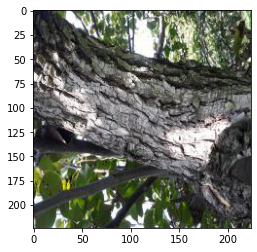

1/1 [==============================] - 0s 16ms/step
파일 이름 : V006_80_0_00_01_05_25_0_C42_20201026_0333_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.99996% 확률로 정상 배입니다.




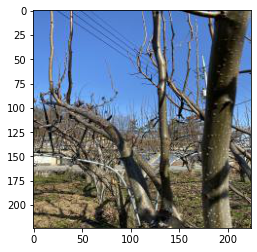

1/1 [==============================] - 0s 16ms/step
파일 이름 : V006_80_0_00_01_04_26_0_C31_20201201_0275_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.999466% 확률로 정상 배입니다.




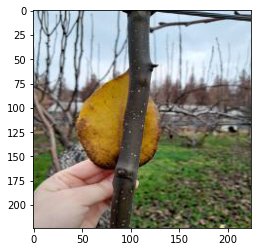

1/1 [==============================] - 0s 18ms/step
파일 이름 : V006_80_0_00_01_04_26_0_C17_20201117_0046_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.66723% 확률로 정상 배입니다.




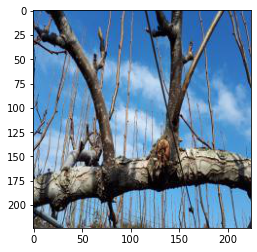

1/1 [==============================] - 0s 17ms/step
파일 이름 : V006_80_0_00_01_04_26_0_B07_20201217_0046_S01_2.JPG
업로드한 사진과 유사한 이미지는 99.99808% 확률로 정상 배입니다.




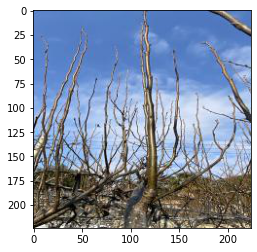

1/1 [==============================] - 0s 18ms/step
파일 이름 : V006_80_0_00_01_05_26_0_C31_20201216_0309_S01_1.JPG
업로드한 사진과 유사한 이미지는 99.99998% 확률로 정상 배입니다.




In [111]:
model = load_model('./Models/Pear_Mobilenet-006-0.0761-0.9739.hdf5')
fruit = ['정상 배','배검은별무늬병','배과수화상병']
path = './배/Test/00_배정상/'
for i in range(10):
# for FileName in os.listdir(path):
    FileName=random.choice(os.listdir(path))
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    img = copy.deepcopy(PIL.Image.open(path + FileName))
    img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
    normalized_image_array = np.asarray(img, dtype = 'float32') / 255.
    plt.imshow(normalized_image_array)
    plt.show()
    
    data[0] = normalized_image_array
    result = (model.predict(data))*100
    result1 = pd.DataFrame(result)
    a= result.tolist()
    a.sort()
    print("파일 이름 : " + FileName)
    for i in range(len(result[0])) :
        if result[0][i] > 40:
            a = result[0][i]
            a = a.astype(str)
            print("업로드한 사진과 유사한 이미지는 " + a + "% 확률로 " + fruit[i] + "입니다.")
            print('\n')
       

In [39]:
# model = load_model('./Models/VGG19-010-0.1600-0.9630.hdf5')
# fruit = ['정상 배','배검은별무늬병','배과수화상병','사과갈색무늬병','사과과수화상병','사과부란병','사과점무늬낙엽병','사과탄저병','정상 사과']
# path = './uploads/images/과일 배/'
# for FileName in os.listdir(path):
#     data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
#     image = copy.deepcopy(PIL.Image.open(path + FileName))
#     image = ImageOps.fit(image, (224, 224), Image.ANTIALIAS)
#     normalized_image_array = np.asarray(image, dtype = 'float32') / 255.
#     plt.imshow(normalized_image_array)
#     plt.show()
    
#     data[0] = normalized_image_array
#     result = (model.predict(data))*100
#     result1 = pd.DataFrame(result)
#     a= result.tolist()
#     a.sort()
#     print(FileName)
#     for i in range(len(result[0])) :
#         if result[0][i] > 40:
#             a = result[0][i]
#             a = a.astype(str)
#             print("업로드한 사진과 유사한 이미지는 " + a + "% 확률로 " + fruit[i] + "입니다.")
#             print('\n')
       